In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import re
import string
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import re
import csv
import pickle
from collections import defaultdict
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim
import pandas as pd
from gensim.test.utils import common_texts
from gensim import corpora
from gensim.corpora.dictionary import Dictionary
from gensim.models import hdpmodel, ldamodel
from pprint import pprint

In [2]:
# load the tips data
tips = pd.read_csv("/Users/avarezvani/Downloads/yelp-dataset/tips_final.csv")

In [3]:
tips.head()

,business_id,name,postal_code,stars,review_count,categories,user_id,text,date,compliment_count,text_length,tips_id,text_new
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",JysF40STBTmx7h-sU1FHgg,Tonkatsu Ramen!!!,2013-02-20 23:22:46,0,17,0,tonkatsu ramen
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",FyikYazQbNoOumDooOQyyA,"Ramen, Gyoza, miso soup and green tea ice crea...",2018-01-19 05:31:59,0,59,1,ramen gyoza miso soup green tea ice cream great
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",FyikYazQbNoOumDooOQyyA,Best ramen I've had in the Charlotte area,2017-04-08 05:34:25,0,41,2,best ramen ive charlotte area
3,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",7M-rWYRGPfCDnb7tjl7QGQ,Get whatever lunch special A or B is. Trust me...,2011-11-19 18:19:24,0,66,3,get whatever lunch special trust
4,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",MZFUSBTj7RDpf19v5qP9HA,Best Chirazshi in town!,2016-02-26 22:43:31,0,23,4,best chirazshi town


In [4]:
# identify the number of restaurants
tips["business_id"].nunique()

31828

### Tokenizing

In [5]:
def tokenize_sentences(sentences):
    for x in sentences:
        yield(gensim.utils.simple_preprocess(str(x)))

tokens = list(tokenize_sentences(tips.text_new.values.tolist()))

print(tokens[0:9])

[['tonkatsu', 'ramen'], ['ramen', 'gyoza', 'miso', 'soup', 'green', 'tea', 'ice', 'cream', 'great'], ['best', 'ramen', 'ive', 'charlotte', 'area'], ['get', 'whatever', 'lunch', 'special', 'trust'], ['best', 'chirazshi', 'town'], ['lunch', 'special', 'saturday', 'also'], ['make', 'rsvp', 'advance'], ['asahi', 'super', 'dry', 'gigantic', 'made', 'japan'], ['lunch', 'special', 'set', 'always', 'front', 'cost']]


### Developing model for Bigrams & Trigrams with gensim

In [6]:
bigram = gensim.models.Phrases(tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[tokens], threshold=100)

In [7]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [8]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [10]:
data_words_bigrams = make_bigrams(tokens)

data_words_trigrams = make_trigrams(tokens)

print(data_words_bigrams[0:9])

# note the first bigram seen with "tokatsu_ramen"

[['tonkatsu_ramen'], ['ramen', 'gyoza', 'miso', 'soup', 'green', 'tea', 'ice_cream', 'great'], ['best', 'ramen', 'ive', 'charlotte', 'area'], ['get', 'whatever', 'lunch', 'special', 'trust'], ['best', 'chirazshi', 'town'], ['lunch', 'special', 'saturday', 'also'], ['make', 'rsvp', 'advance'], ['asahi', 'super', 'dry', 'gigantic', 'made', 'japan'], ['lunch', 'special', 'set', 'always', 'front', 'cost']]


In [ ]:
### Baseline with word cloud

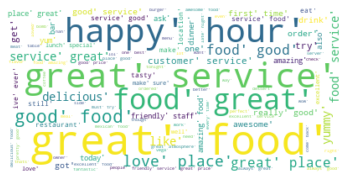

In [11]:
# Baseline with a word cloud
words = str(data_words_bigrams)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### interesting insights from the wordcloud include:
- mentions of food and service (both of which would help to be seen in the reviews
- mentions of a "happy hour" (which would be helpful to see up top and closer to hours of operation)
- mentions of "like" and "try" (which would be helpful for the popular dishes section of Yelp)
- interesting to see that there is a lot of positivity in the reviews: are tips generally more positive than negative?
- also interesting that there is "good food" and also "food good." I think there is some room to combine these, as we look into the topics.

### LDA:


In [11]:
id2word = corpora.Dictionary(data_words_bigrams)
dictionary = corpora.Dictionary(data_words_bigrams)
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

In [12]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [13]:
print(corpus[0:20])
# can see many unique words here

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(6, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(10, 1), (18, 1), (19, 1)], [(14, 1), (15, 1), (20, 1), (21, 1)], [(22, 1), (23, 1), (24, 1)], [(25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(14, 1), (15, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(35, 1)], [(10, 1), (19, 1), (35, 1), (36, 1)], [(36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(14, 1), (15, 1), (43, 1)], [(10, 1), (11, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(10, 1), (14, 2), (15, 1), (49, 1), (50, 1)], [(13, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 1), (62, 1)], [(63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(1, 1), (11, 1), (14, 1), (45, 1), (77, 1), (78, 1), (79, 1)], [(80, 1), (81, 1), (82, 1), (83, 1)]]


In [14]:
# LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10,chunksize=1000, passes=1)

In [15]:
# Print the Keyword in the 10 topics
pprint(lda_model.show_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.055*"hour" + 0.051*"happy" + 0.035*"fry" + 0.034*"day" + 0.030*"night" + '
  '0.027*"open" + 0.023*"pm" + 0.018*"come" + 0.016*"sunday" + '
  '0.016*"location"'),
 (1,
  '0.074*"try" + 0.046*"delicious" + 0.038*"salad" + 0.033*"yummy" + '
  '0.027*"good" + 0.025*"roll" + 0.024*"hot" + 0.024*"sauce" + 0.023*"must" + '
  '0.020*"soup"'),
 (2,
  '0.074*"pizza" + 0.042*"great" + 0.034*"beer" + 0.027*"good" + 0.025*"menu" '
  '+ 0.023*"place" + 0.022*"wing" + 0.019*"everything" + 0.018*"bbq" + '
  '0.016*"selection"'),
 (3,
  '0.030*"dont" + 0.028*"order" + 0.019*"like" + 0.018*"chicken" + 0.016*"get" '
  '+ 0.016*"taste" + 0.015*"want" + 0.014*"rice" + 0.014*"sweet" + '
  '0.014*"menu"'),
 (4,
  '0.114*"love" + 0.093*"place" + 0.077*"time" + 0.030*"eat" + 0.024*"first" + '
  '0.021*"good" + 0.018*"every" + 0.014*"know" + 0.014*"never" + 0.014*"slow"'),
 (5,
  '0.042*"chicken" + 0.019*"steak" + 0.019*"egg" + 0.018*"ask" + 0.018*"made" '
  '+ 0.015*"get" + 0.014*"brunch" + 0.014*"c

In [16]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("coherence score:", coherence_lda)


Coherence Score:  0.4156083962009568


In [17]:
# Compute Model Perplexity Score
print("model perplexity score:", lda_model.log_perplexity(corpus))

model perplexity score: -8.499812823640967


In [53]:
topics_number = 3
word_dictionary = {};

for i in range(topics_number):
    words = ldamodel.show_topic(i, topn = 10)
    word_dictionary["topic" + "{:d}".format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dictionary)

# source: 

AttributeError: module 'gensim.models.ldamodel' has no attribute 'show_topic'

In [162]:
# lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
#pyLDAvis.display(lda_display)

In [24]:
tips = tips.text_new.values.tolist()

tips_indiv_words = gensim.utils.simple_preprocess(str(tips))

In [77]:
bigram = gensim.models.Phrases(tips)
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(tips_indiv_words)
# trigram_mod = gensim.models.phrases.Phraser(trigram)